#  1. Importações e dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_theme()

In [2]:
import pandas as pd

# Carregar a base original
df = pd.read_csv('/home/fause/ML-Transportes/PBIC/Etapa3/acidentes_pbic_2020_2025_Final.csv', encoding="utf-8")

df_acidentes = df.drop_duplicates(subset=["id", "pesid"]).copy()

df.tail()


/tmp/ipykernel_81719/493917375.py:4: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/fause/ML-Transportes/PBIC/Etapa3/acidentes_pbic_2020_2025_Final.csv', encoding="utf-8")


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,mes,dia_mes,hora,gravidade_numerica,total_vitimas,Marca_Principal,Modelo_Grupo,Nome_Modelo,Fabricante,Modelo
1678321,705809.0,1571785.0,2025-05-01,quinta-feira,19:50:00,SE,101.0,"98,6",SAO CRISTOVAO,Sim,...,5,1,19,0,0.0,Não Informado,Não Informado,NO,Não Informado,NO
1678322,705809.0,1571786.0,2025-05-01,quinta-feira,19:50:00,SE,101.0,"98,6",SAO CRISTOVAO,Sim,...,5,1,19,3,1.0,HONDA,CG 125 FAN ES,CG,HONDA,CG
1678323,705809.0,1571785.0,2025-05-01,quinta-feira,19:50:00,SE,101.0,"98,6",SAO CRISTOVAO,Sim,...,5,1,19,0,0.0,Não Informado,Não Informado,NO,Não Informado,NO
1678324,705883.0,1571987.0,2025-06-22,domingo,12:30:00,MG,354.0,764,ITAMONTE,Sim,...,6,22,12,1,1.0,HONDA,CB 650R,CB,HONDA,CB
1678325,705883.0,1571987.0,2025-06-22,domingo,12:30:00,MG,354.0,764,ITAMONTE,Sim,...,6,22,12,1,1.0,HONDA,CB 650R,CB,HONDA,CB


# Contar os Top 10 tipos de acidentes dessa marca

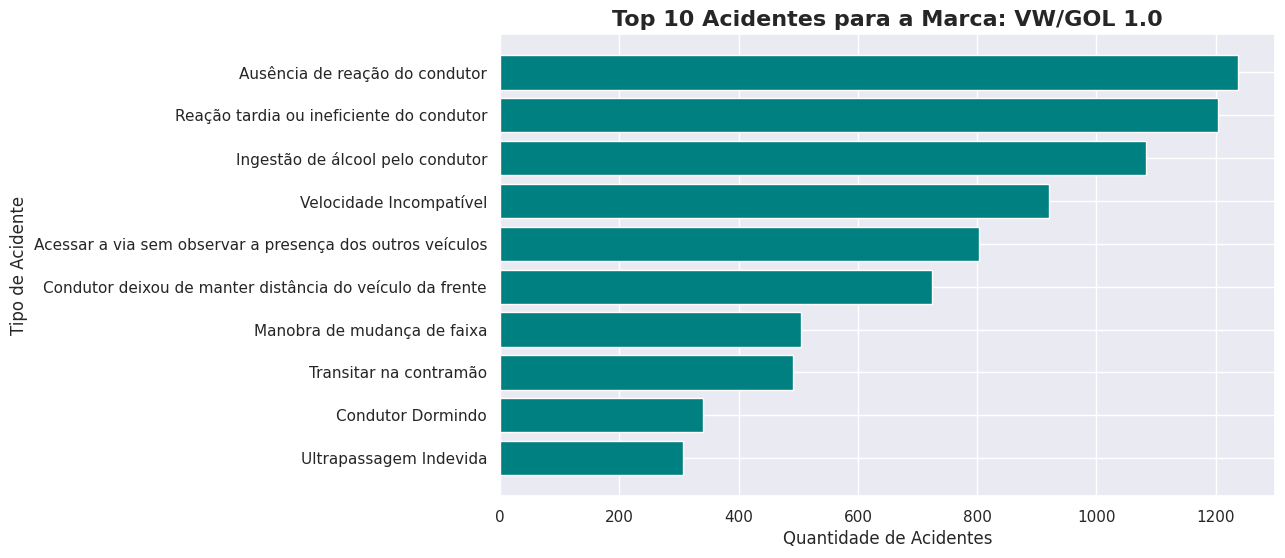

In [3]:
import matplotlib.pyplot as plt

# Definir os valores inválidos
valores_invalidos = ['Não Informado/Não Informado', 'Não Informado/Não Informado/Não Informado', 'NA/NA/NA', 'NA/NA']
df_limpo = df[~df['marca'].isin(valores_invalidos)]
# Marca específica que queremos analisar
marca_especifica = "VW/GOL 1.0"

# Filtrar apenas os acidentes dessa marca
df_marca = df_limpo[df_limpo['marca'] == marca_especifica]

# Contar os Top 10 tipos de acidentes dessa marca
top_causas = (
    df_marca.groupby('causa_acidente')
    .size()
    .reset_index(name='qtd_acidentes')
    .sort_values('qtd_acidentes', ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_causas['causa_acidente'], top_causas['qtd_acidentes'], color='teal')
plt.title(f"Top 10 Acidentes para a Marca: {marca_especifica}", fontsize=16, fontweight='bold')
plt.xlabel("Quantidade de Acidentes")
plt.ylabel("Tipo de Acidente")
plt.gca().invert_yaxis()  # maior no topo
plt.show()


# Busca de Registros do acidente ID

In [4]:
import pandas as pd

# Caminho do arquivo
caminho = '/home/fause/ML-Transportes/PBIC/Etapa2/acidentes_pbic_2020_2025_condutor_marca_limpo_Final.csv'

# Carregar o DataFrame
df = pd.read_csv(caminho, encoding='utf-8')

# Definir o ID do acidente que você quer consultar
id_alvo = 260057.0
#579070.0

# Filtrar os registros com esse ID
acidente = df[df['id'] == id_alvo]

# Verificar se encontrou registros
if acidente.empty:
    print(f"Nenhum registro encontrado para o ID {id_alvo}.")
else:
    print(f"=== Registros do acidente ID {id_alvo} ===")
    print(f"Total de veículos/pessoas envolvidos: {acidente.shape[0]}\n")

    # Selecionar colunas relevantes
    colunas = [
        'id', 'id_veiculo',
        'marca_veiculo', 'Marca_Arvore', 'Marca_Subarvore',
        'tipo_veiculo', 'ano_fabricacao_veiculo',
        'sexo_condutor', 'idade_condutor',
        'municipio', 'data_inversa','ordem_tipo_acidente', 'tipo_acidente', 'causa_acidente'
    ]

    # Filtrar apenas colunas que realmente existem no CSV
    colunas_existentes = [c for c in colunas if c in acidente.columns]

    # Mostrar o resultado
    display(acidente[colunas_existentes])


/tmp/ipykernel_81719/10204651.py:7: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho, encoding='utf-8')


=== Registros do acidente ID 260057.0 ===
Total de veículos/pessoas envolvidos: 4



,id,id_veiculo,Marca_Arvore,Marca_Subarvore,tipo_veiculo,ano_fabricacao_veiculo,municipio,data_inversa,ordem_tipo_acidente,tipo_acidente,causa_acidente
36,260057.0,464360.0,FIAT,UNO,Automóvel,1997.0,BRASILIA,2020-01-01,2,Colisão traseira,Ingestão de Álcool
37,260057.0,464361.0,HONDA,CB,Motocicleta,2019.0,BRASILIA,2020-01-01,2,Colisão traseira,Ingestão de Álcool
38,260057.0,464360.0,FIAT,UNO,Automóvel,1997.0,BRASILIA,2020-01-01,1,Atropelamento de Pedestre,Ingestão de Álcool
39,260057.0,464361.0,HONDA,CB,Motocicleta,2019.0,BRASILIA,2020-01-01,1,Atropelamento de Pedestre,Ingestão de Álcool
